In [9]:
%pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


Exact NN (Flat) indices: [[895 451 375]] distances: [[0.04164944 0.04808223 0.05523108]]
IVF+PQ indices: [[182 172 848]] distances: [[0.08804266 0.09089994 0.11803695]]
Waktu Exact: 0.0
Waktu IVF+PQ: 0.0


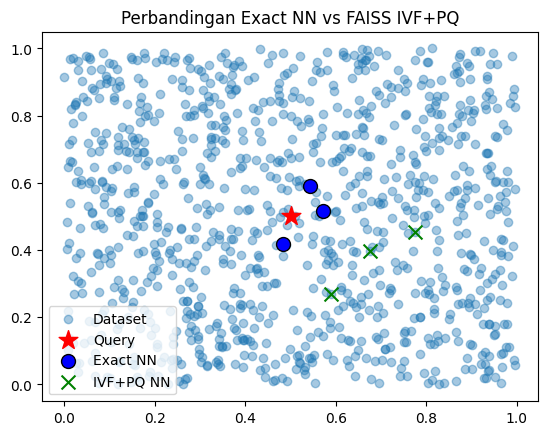

In [34]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 5).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5, 0.5, 0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(5)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 5        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(5)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 5, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

| Jumlah data | Dimensi | Hasil Index terdekat ENN vs ANN | Waktu komputasi ENN vs ANN |
|------------|---------|--------------------------------|-------------------|
| 1000000    | 2D     | [286942, 583487, 695123] vs [286942, 695123, 581054] | 0.0019927 s vs 0.0 s |
| 1000    | 2D     | [137 170 750] vs [137 170 750] | 0.0 s vs 0.0 s |
| 1000       | 5D     | [895 451 375] vs [182 172 848] | 0.0 s vs 0.0 s |
| 1000000       | 5D     | [794791 501340 912100] vs [912100 864955 837855] | 0.004000425338745117 s vs  | 0.0009999275207519531 s|